In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import sklearn

%matplotlib inline
plt.style.use('ggplot')

In [3]:
with open("filenames_topics.json", 'r') as f:
        topics_articles = json.load(f)

In [4]:
topics_articles.keys()

[u'Neuroscience', u'Cell biology']

In [5]:
header = ['article', 'subject']

for subject, articles in topics_articles.iteritems():
    for pub_id, topics in articles.iteritems():
        header.extend(topics)        
        
print len(header)
print header[:20]

2392
['article', 'subject', u'scale', u'antibody', u'arrow', u'indicate', u'nonspecific', u'mutant', u'receptive', u'signal', u'junction', u'epithelial', u'hand', u'reduced', u'arm', u'higher', u'hand', u'behaviour', u'white', u'matter']


In [6]:
top_data = []

for subject, articles in topics_articles.iteritems():
    for pub_id, topics in articles.iteritems():        
        ct = []
        ct.append(pub_id)
        ct.append(subject)
        tpcs = ['1' if h in topics else '0' for h in header[2:]]
        ct.extend(tpcs)
        top_data.append(ct)
        
print len(top_data)
print len(top_data[0]), len(top_data[50]), len(top_data[100])
print top_data[0][:20]

239
2392 2392 2392
[u'elife05116', u'Neuroscience', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0']


In [7]:
topics_data = np.array(top_data)
print topics_data

[[u'elife05116' u'Neuroscience' u'1' ..., u'0' u'0' u'0']
 [u'elife02094' u'Neuroscience' u'0' ..., u'0' u'0' u'0']
 [u'elife01206' u'Neuroscience' u'0' ..., u'0' u'0' u'0']
 ..., 
 [u'elife04810' u'Cell biology' u'0' ..., u'0' u'0' u'0']
 [u'elife02678' u'Cell biology' u'0' ..., u'0' u'0' u'0']
 [u'elife05697' u'Cell biology' u'1' ..., u'1' u'1' u'1']]


In [21]:
## Data matrix: column 3 to the end
X = topics_data[:, 2:2392].astype(int)
## Class vector: column 2
Y = topics_data[:, 1]   

In [22]:
print "X dimension: ", X.shape
print "Y dimension: ", Y.shape

X dimension:  (239, 2390)
Y dimension:  (239,)


In [66]:
Yfreq = sp.stats.itemfreq(Y)
print Yfreq
cb_total = int(Yfreq[0][1])
n_total = int(Yfreq[1][1])

[[u'Cell biology' u'67']
 [u'Neuroscience' u'172']]


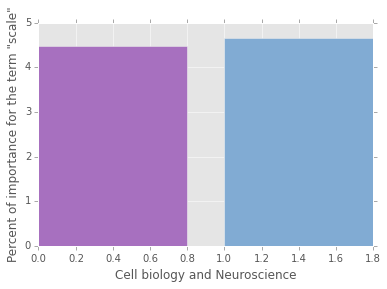

In [62]:
a = header[2]
a_rep = topics_data[:, 1:3]
a_freq = sp.stats.itemfreq(a_rep)

cb = [int(i[1]) for i in a_rep if i[0]=='Cell biology']
n = [int(i[1]) for i in a_rep if i[0]=='Neuroscience']

cb_freq = sum(cb)*100./cb_total
n_freq =sum(n)*100./n_total

plt.bar(left = 0, height = cb_freq, color='#A770BF')
plt.bar(left = 1, height = n_freq, color='#81ABD3')
plt.xlabel("Cell biology and Neuroscience")
plt.ylabel("Percent of importance for the term \"%s\"" %a)

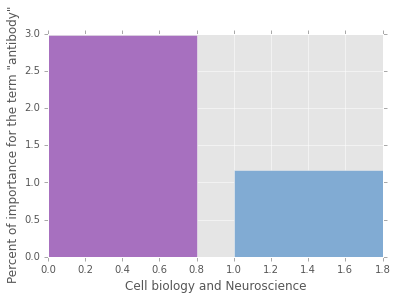

In [61]:
b = header[3]
b_rep = topics_data[:, (1, 4)]
b_freq = sp.stats.itemfreq(b_rep)

cb = [int(i[1]) for i in b_rep if i[0]=='Cell biology']
n = [int(i[1]) for i in b_rep if i[0]=='Neuroscience']

cb_freq = sum(cb)*100./cb_total
n_freq = sum(n)*100./n_total

plt.bar(left = 0, height = cb_freq, color='#A770BF')
plt.bar(left = 1, height = n_freq, color='#81ABD3')
plt.xlabel("Cell biology and Neuroscience")
plt.ylabel("Percent of importance for the term \"%s\"" %b)

In [54]:
l = [header[i] for i in range(2, 8)] 
print l

[u'scale', u'antibody', u'arrow', u'indicate', u'nonspecific', u'mutant']


1.49253731343
2.98507462687
1.49253731343
0.0
1.49253731343
0.0
[1.492537313432836, 2.985074626865672, 1.492537313432836, 0.0, 1.492537313432836, 0.0]
[1.1627906976744187, 1.1627906976744187, 2.3255813953488373, 0.5813953488372093, 1.744186046511628, 0.5813953488372093]


AttributeError: 'AxesSubplot' object has no attribute 'legends'

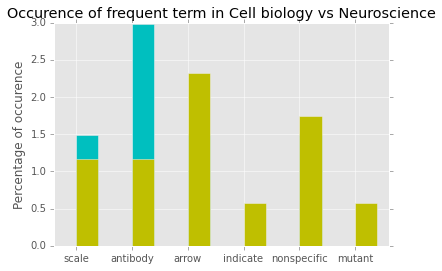

In [67]:
freqs_cb, freqs_n = [], []
N = range(2, 8)

for j in N:
    cb = [int(i[1]) for i in topics_data[:, (1, j+1)] if i[0]=='Cell biology']
    n = [int(i[1]) for i in topics_data[:, (1, j+1)] if i[0]=='Neuroscience']
    cb_freq = sum(cb)*100./cb_total
    print cb_freq
    n_freq = sum(n)*100./n_total
    freqs_cb.append(cb_freq)
    freqs_n.append(n_freq)

print freqs_cb
print freqs_n
ind = np.arange(len(N))
width = 0.4

fig, ax = plt.subplots()
rects_cb = ax.bar(ind+width, freqs_cb, width, color='c')
rects_n = ax.bar(ind+width, freqs_n, width, color='y')

ax.set_ylabel('Percentage of occurence')
ax.set_title('Occurence of frequent term in Cell biology vs Neuroscience')
ax.set_xticks(ind+width)
xlabels = [header[i] for i in N]
ax.set_xticklabels( xlabels)
ax.legends((rects_cb[0], rects_n[0]), ('Cell biology', 'Neuroscience'))

plt.show()

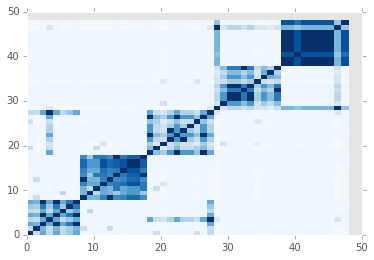

In [48]:
correlation_matrix = np.corrcoef(X[:,2:50], rowvar=0)
fig, ax = plt.subplots()
heatmap = ax.pcolor(correlation_matrix, cmap = plt.cm.Blues)